In [ ]:
'''
【课程1.4】  数据连续属性离散化

连续属性变换成分类属性，即连续属性离散化
在数值的取值范围内设定若干个离散划分点，将取值范围划分为一些离散化的区间，最后用不同的符号或整数值代表每个子区间中的数据值

等宽法 / 等频法 

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 等宽法:将数据均匀分布成n等份，每份的间距相等
# cut方法
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元

bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
print(cats)
print(type(cats))
print('-' * 88)
# 返回的是一个特殊的categorical对象:一组表示面元名称的字符串

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
----------------------------------------------------------------------------------------


In [4]:
print(cats.codes)  # 分类后的标签
print(type(cats.codes))

[0 0 0 1 0 0 2 1 3 2 2 1]
<class 'numpy.ndarray'>


In [5]:
print(cats.categories)
print(type(cats.categories))

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
<class 'pandas.core.indexes.interval.IntervalIndex'>


In [6]:
# 按照区间计数
print(pd.value_counts(cats))

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [7]:
print(pd.cut(ages,[18,26,36,61,100],right=False))
print('-------')
# 通过right函数修改闭端，默认为True

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
-------


In [8]:
group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))
print('-------')
# 可以设置自己的区间名称，用labels参数

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]
-------


    ages       label
0     20       Youth
1     22       Youth
2     25       Youth
3     27  YoungAdult
4     21       Youth
5     23       Youth
6     37  MiddleAged
7     31  YoungAdult
8     61      Senior
9     45  MiddleAged
10    41  MiddleAged
11    32  YoungAdult
----------------------------------------------------------------------------------------
Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
Name: ages, dtype: int64


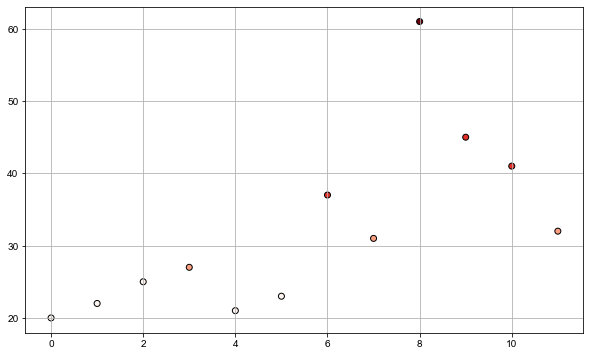

In [18]:
df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'], bins, labels=group_names)
df['label'] = s
cut_counts = s.value_counts(sort=False)
print(df)
print('-' * 88)
print(cut_counts)

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ages'], cmap='Reds', c=cats.codes, marker='o', edgecolors='k')
plt.grid()

(0.717, 3.363]      250
(0.0592, 0.717]     250
(-0.701, 0.0592]    250
(-3.042, -0.701]    250
dtype: int64
------


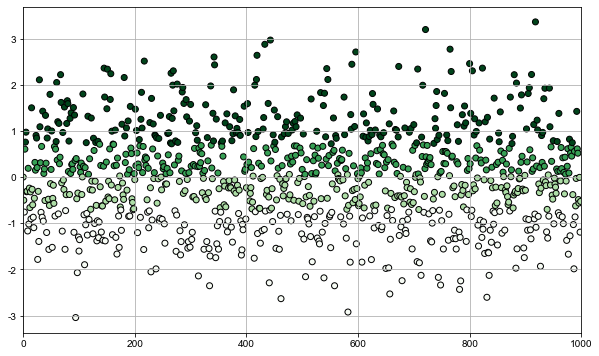

In [21]:
# 等频法
# qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s, 4)  # 按四分位数进行切割，可以试试pd.qcut(data, 10)

print(pd.value_counts(cats))
print('------')
# qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
# 也可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])

plt.figure(figsize=(10, 6))
plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes, edgecolors='k')
plt.xlim([0,1000])
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象